In [1]:



# # LOAD THE DATA SET


import pandas as pd

df = pd.read_excel(r"C:\Users\ASUS\Downloads\online+retail\Online Retail.xlsx")



In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# # Data Cleaning

In [4]:
## checking negative values in Quantity

In [5]:
(df['Quantity']<0).sum() ## count_no_of_negative_values_in_quantity_columns


10624

In [7]:
##removing negative values in Quantity and UnitPrice

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


# Exploratory Data Analysis (EDA)

In [9]:
##Top-selling products:
Top_Products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
Top_Products

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

In [10]:
## Sales by country:
Sales_By_Country = df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
Sales_By_Country


Country
United Kingdom          4662390
Netherlands              200361
EIRE                     147173
Germany                  119261
France                   112103
Australia                 83901
Sweden                    36083
Switzerland               30629
Spain                     27940
Japan                     26016
Belgium                   23237
Norway                    19336
Portugal                  16258
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Hong Kong                  4773
Israel                     4409
Poland                     3684
Unspecified                3300
Canada                     2763
USA                        2458
Iceland                    2458
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671


In [18]:
##  Revenue calculation:
df['Revenue'] =  (df['Quantity']*df['UnitPrice'])

df['Revenue']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Revenue, Length: 530104, dtype: float64

# # Key Metrics

In [19]:
## Total revenue per customer:
df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending = False)

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
             ...    
16878.0        13.30
17956.0        12.75
16454.0         6.90
14792.0         6.20
16738.0         3.75
Name: Revenue, Length: 4338, dtype: float64

In [20]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [21]:
## Average order value
Aov = round(df.groupby('InvoiceNo')['Revenue'].sum().mean(),2)
Aov

534.4

# # Data Visualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


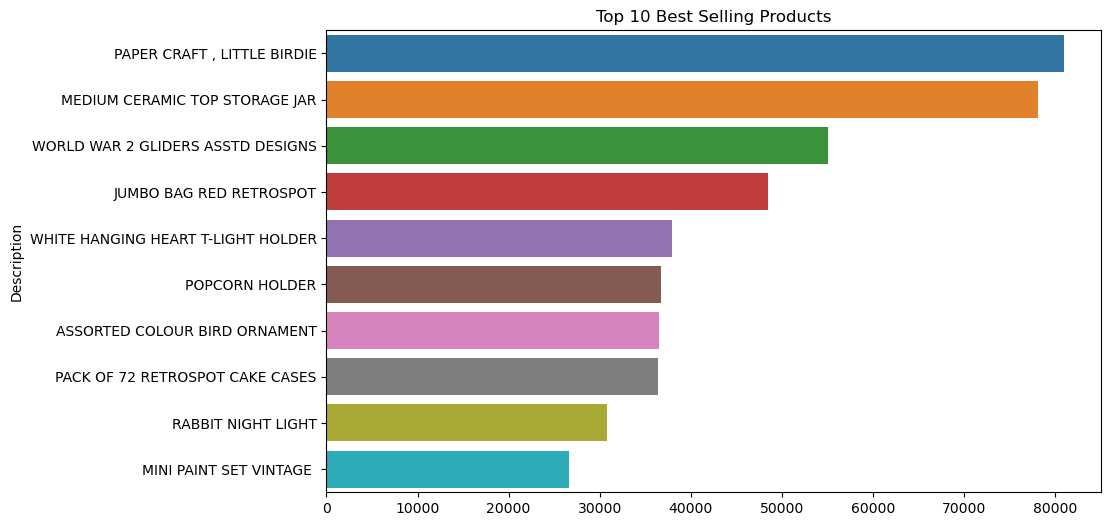

In [23]:
## Top-selling products bar chart:
plt.figure(figsize=(10,6))
sns.barplot(x=Top_Products.values, y=Top_Products.index)
plt.title('Top 10 Best Selling Products')
plt.show()


In [24]:
Revenue_By_Country = df.groupby('Country')['Revenue'].sum().sort_values(ascending = False).head(10)
Revenue_By_Country

Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Australia          138521.310
Spain               61577.110
Switzerland         57089.900
Belgium             41196.340
Sweden              38378.330
Name: Revenue, dtype: float64

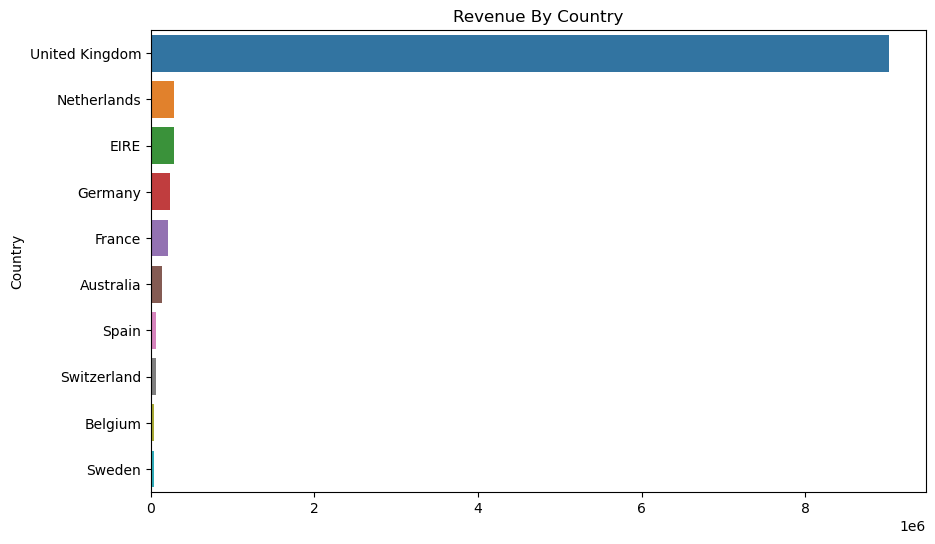

In [25]:
## Revenue distribution by country:
plt.figure(figsize=(10,6))
sns.barplot(x=Revenue_By_Country.values, y=Revenue_By_Country.index)
plt.title('Revenue By Country')
plt.show()


# # Customer Segmentation (RFM Analysis)

In [26]:
##Recency Calculation: Find the date of the most recent purchase for each customer and 
## compare it to the last date in the dataset.(in days)
latest_date = df['InvoiceDate'].max()
df_recency = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date-x.max()).days})
df_recency = df_recency.rename(columns={'InvoiceDate': 'Recency'})
df_recency = df_recency.reset_index()
df = df.merge(df_recency, on='CustomerID', how='left')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,371.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,371.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371.0
...,...,...,...,...,...,...,...,...,...,...
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0.0
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0.0
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0.0
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0.0


In [27]:
## Frequency Calculation: Count how many times each customer made a purchase (distinct InvoiceNo).
df_frequency =  df.groupby('CustomerID').agg({'InvoiceNo': 'nunique'})
df_frequency = df_frequency.rename(columns = {'InvoiceNo':'Frequency'})
df_frequency = df_frequency.reset_index()
df = df.merge(df_frequency, on='CustomerID', how='left')
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Recency,Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,371.0,34.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371.0,34.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,371.0,34.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371.0,34.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0.0,4.0
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0.0,4.0
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0.0,4.0
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0.0,4.0


In [28]:
## Monetary Calculation: Sum the total spending of each customer.
df_monetary = df.groupby('CustomerID').agg({'Revenue': 'sum'})
df_monetary = df_monetary.rename(columns = {'Revenue':'Monetary'})
df_monetary = df_monetary.reset_index()
df = df.merge(df_monetary, on='CustomerID', how='left')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Recency,Frequency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,371.0,34.0,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371.0,34.0,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,371.0,34.0,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371.0,34.0,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,371.0,34.0,5391.21
...,...,...,...,...,...,...,...,...,...,...,...,...
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0.0,4.0,862.81
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0.0,4.0,862.81
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0.0,4.0,862.81
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0.0,4.0,862.81
